# Работа с Excel

Материалы:
* Макрушин С.В. Лекция 7: Работа с Excel
* https://docs.xlwings.org/en/stable/quickstart.html
* https://nbviewer.jupyter.org/github/pybokeh/jupyter_notebooks/blob/master/xlwings/Excel_Formatting.ipynb#search_text


## Задачи для совместного разбора

1. На листе "Рецептура" файла `себестоимостьА_в1.xlsx` для области "Пшеничный хлеб" рассчитать себестоимость всех видов продукции.

2. Результаты расчетов 1.1 сохранить в отдельном столбце области "Пшеничный хлеб"

3. Приблизить форматирование столбца, добавленного в задаче 2 к оформлению всей области.

4. Выполнить 3 с помощью "протягиваемых" формул.

## Лабораторная работа 7.1

1. Загрузите данные из файлов `reviews_sample.csv` (__ЛР2__) и `recipes_sample.csv` (__ЛР5__) в виде `pd.DataFrame`. Обратите внимание на корректное считывание столбца(ов) с индексами. Оставьте в таблице с рецептами следующие столбцы: `id`, `name`, `minutes`, `submitted`, `description`, `n_ingredients`

In [192]:
import pandas as pd
t2=pd.read_csv('C:/Users/den10/Desktop/Технологии обработки данных/Лабораторные работы/Laboratory-Work/Лабораторные работы/2/data/reviews_sample.csv', delimiter=',', index_col=0)
t1=pd.read_csv('C:/Users/den10/Desktop/Технологии обработки данных/Лабораторные работы/Laboratory-Work/Лабораторные работы/2/data/recipes_sample.csv', delimiter=',', index_col=1)
t1= t1[['name', 'minutes', 'submitted', 'description', 'n_ingredients']]
merged_table= pd.merge(t2, t1, left_on= "recipe_id", right_index=True, how="left")
#merged_table.drop(['Unnamed: 0'], axis=1, inplace=True)
merged_table.sort_values(by='recipe_id', ascending=True)

,user_id,recipe_id,date,rating,review,name,minutes,submitted,description,n_ingredients
532499,68674,48,2004-05-03,2,I picked this recipe over the other BCP recipe...,boston cream pie,135,1999-08-24,NaN,15.0
532498,32421,48,2002-03-15,0,The flavor was great. But I think there was no...,boston cream pie,135,1999-08-24,NaN,15.0
462146,1060485,55,2009-04-07,5,loved this! my family ate it all up! will deff...,betty crocker s southwestern guacamole dip,125,1999-09-15,NaN,5.0
462147,851190,55,2010-05-23,5,I used Italian plum tomatoes for this as they ...,betty crocker s southwestern guacamole dip,125,1999-09-15,NaN,5.0
462145,165567,55,2006-03-31,5,I LOVED this recipe! I was looking for a guaca...,betty crocker s southwestern guacamole dip,125,1999-09-15,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...
744576,1925885,536729,2018-08-16,5,"Loved this simple salad! DH saw it and said, &...",creole watermelon feta salad,10,2018-08-11,spicy watermelon salad. from tony chachere's s...,NaN
631001,2001285346,536747,2018-09-06,0,Such an art Beautiful,lemon pom pom cake,210,2018-08-15,"by far one of my most joyous cake creations, t...",20.0
631002,2002007477,536747,2018-09-06,0,Like recipe,lemon pom pom cake,210,2018-08-15,"by far one of my most joyous cake creations, t...",20.0
631003,1460111,536747,2018-09-26,0,Very cute cake! Love the marshmallow pom poms....,lemon pom pom cake,210,2018-08-15,"by far one of my most joyous cake creations, t...",20.0


2. Случайным образом выберите 5% строк из каждой таблицы и сохраните две таблицы на разные листы в один файл `recipes.xlsx`. Дайте листам названия "Рецепты" и "Отзывы", соответствующие содержанию таблиц. 

In [138]:
def GetRandomSeries(table, n):
    randSample = table.sample(n=n)
    #print(type(randSample[column])) #проверка типа данных
    return randSample
seq1=GetRandomSeries(t1, int(t1.shape[0]/100*5))
seq2=GetRandomSeries(t2, int(t2.shape[0]/100*5))
with pd.ExcelWriter('recipes.xlsx') as writer:
    seq1.to_excel(writer, sheet_name='Рецепты')
    seq2.to_excel(writer, sheet_name='Отзывы')

3. Используя `xlwings`, добавьте на лист `Рецепты` столбец `seconds_assign`, показывающий время выполнения рецепта в секундах. Выполните задание при помощи присваивания массива значений диапазону ячеек.

In [5]:
import numpy as np
import xlwings as xw
wb = xw.Book('C:/Users/den10/Desktop/Технологии обработки данных/Лабораторные работы/Laboratory-Work/Лабораторные работы/4/recipes.xlsx')
recipes= wb.sheets['Рецепты']
reviews= wb.sheets['Отзывы']
r1= recipes.range('C2').expand('down').value
seconds=list(np.array(r1)*60)
recipes.range('G1').value = str('seconds_assign')
recipes.range('G2').options(transpose= True).value = seconds

4. Используя `xlwings`, добавьте на лист `Рецепты` столбец `seconds_formula`, показывающий время выполнения рецепта в секундах. Выполните задание при помощи формул Excel.

In [6]:
recipes.range('H1').value = str('seconds_formula')
rng=recipes.range('C2').expand('down')
fml= recipes.range('H2:H1501').formula = '=C2*60'
xw.Range('H2:H1501').formula= fml

5. Сделайте названия всех добавленных столбцов полужирными и выровняйте по центру ячейки.

In [7]:
recipes.range('G1:H1').expand('down').api.Font.Bold = True
recipes.range('G1:H1').expand('down').api.HorizontalAlignment =-4108
recipes.range('G1:H1').expand('down').api.VerticalAlignment =-4108

6. Раскрасьте ячейки столбца `minutes` в соответствии со следующим правилом: если рецепт выполняется быстрее 5 минут, то цвет - зеленый; от 5 до 10 минут - жёлтый; и больше 10 - красный.

In [189]:
for i in range(len(rng.value)):
    if rng.value[i] <5:
        rng[i].color =(0,128,0)
    elif rng.value[i] <=10:
        rng[i].color =(255,255,0)
    else:
        rng[i].color =(255, 0, 0)


7. Добавьте на лист `Рецепты`  столбец `n_reviews`, содержащий кол-во отзывов для этого рецепта. Выполните задание при помощи формул Excel.

In [213]:
df1=pd.DataFrame(recipes.range('A2').expand('down').value)
df1.columns = {'id'}
df1=df1.astype({'id': 'int64'})
a1=merged_table[merged_table.recipe_id.isin(df1.id)][['recipe_id', 'minutes', 'review']]
a1=a1.drop_duplicates()
grouped = a1.groupby("recipe_id").count()
lst=grouped['review'].to_list()
recipes.range('I1').value = str('n_reviews')
recipes.range('I2').options(transpose= True).value = lst

## Лабораторная работа 7.2

8. Напишите функцию `validate()`, которая проверяет соответствие всех строк из листа `Отзывы` следующим правилам:
    * Рейтинг - это число от 0 до 5 включительно
    * Соответствующий рецепт имеется на листе `Рецепты`
    
В случае несоответствия этим правилам, выделите строку красным цветом

In [15]:
#Не выполнено
def validate():
    diapason=reviews.range("C2").expand('down')
    for i in range(len(diapason.value)):
        if df1diapason.value[i]isin.contains() == False:
            diapason[i].color =(255, 0, 0)

SyntaxError: invalid syntax (503820992.py, line 4)

9. В файле `recipes_model.csv` находится модель данных предметной области "рецепты". При помощи пакета `csv` считайте эти данные. При помощи пакета `xlwings` запишите данные на лист `Модель` книги `recipes_model.xlsx`, начиная с ячейки `A2`, не используя циклы. Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука. 

In [1]:
import csv
import xlwings as xw
import os
def open_csv_file(csv_file_path):
    """
    Открывает и считывает данные из csv файла
    :param csv_file_path: путь к файлу
    :return: список из списков содержащих данные ячеек
    """
    with open(csv_file_path, 'r', encoding='utf-8') as csv_file:
        reader = csv.reader(csv_file, delimiter=',')
        data = list()
        for row in reader:
            cells=row[0].split(sep="\t")
            data.append(cells)
        return data

def write_list_to_excel(template_file, data_to_insert):
    # Открываем визуализацию excel
    xl_app = xw.App(visible=True, add_book=False)

    # Открываем целевую книгу
    wb = xl_app.books.open(template_file)

    # Присвоение переменной целевому листу
    ws = wb.sheets('Модель')

    # Координаты первой ячейки
    databody_range_first_row = 2
    databody_range_first_column = 1

    # Вставка данных
    ws.range((databody_range_first_row, databody_range_first_column)).value = data_to_insert

    # Сохранение и закрытие целевой книги
    wb.save()
    wb.close()
    
    # Закрытие визуализацию excel
    xl_app.quit()
    
path = os.getcwd()
data_from_csv = open_csv_file(path+'/data/recipes_model.csv')
write_list_to_excel(path+'/recipes_model.xlsx', data_from_csv)

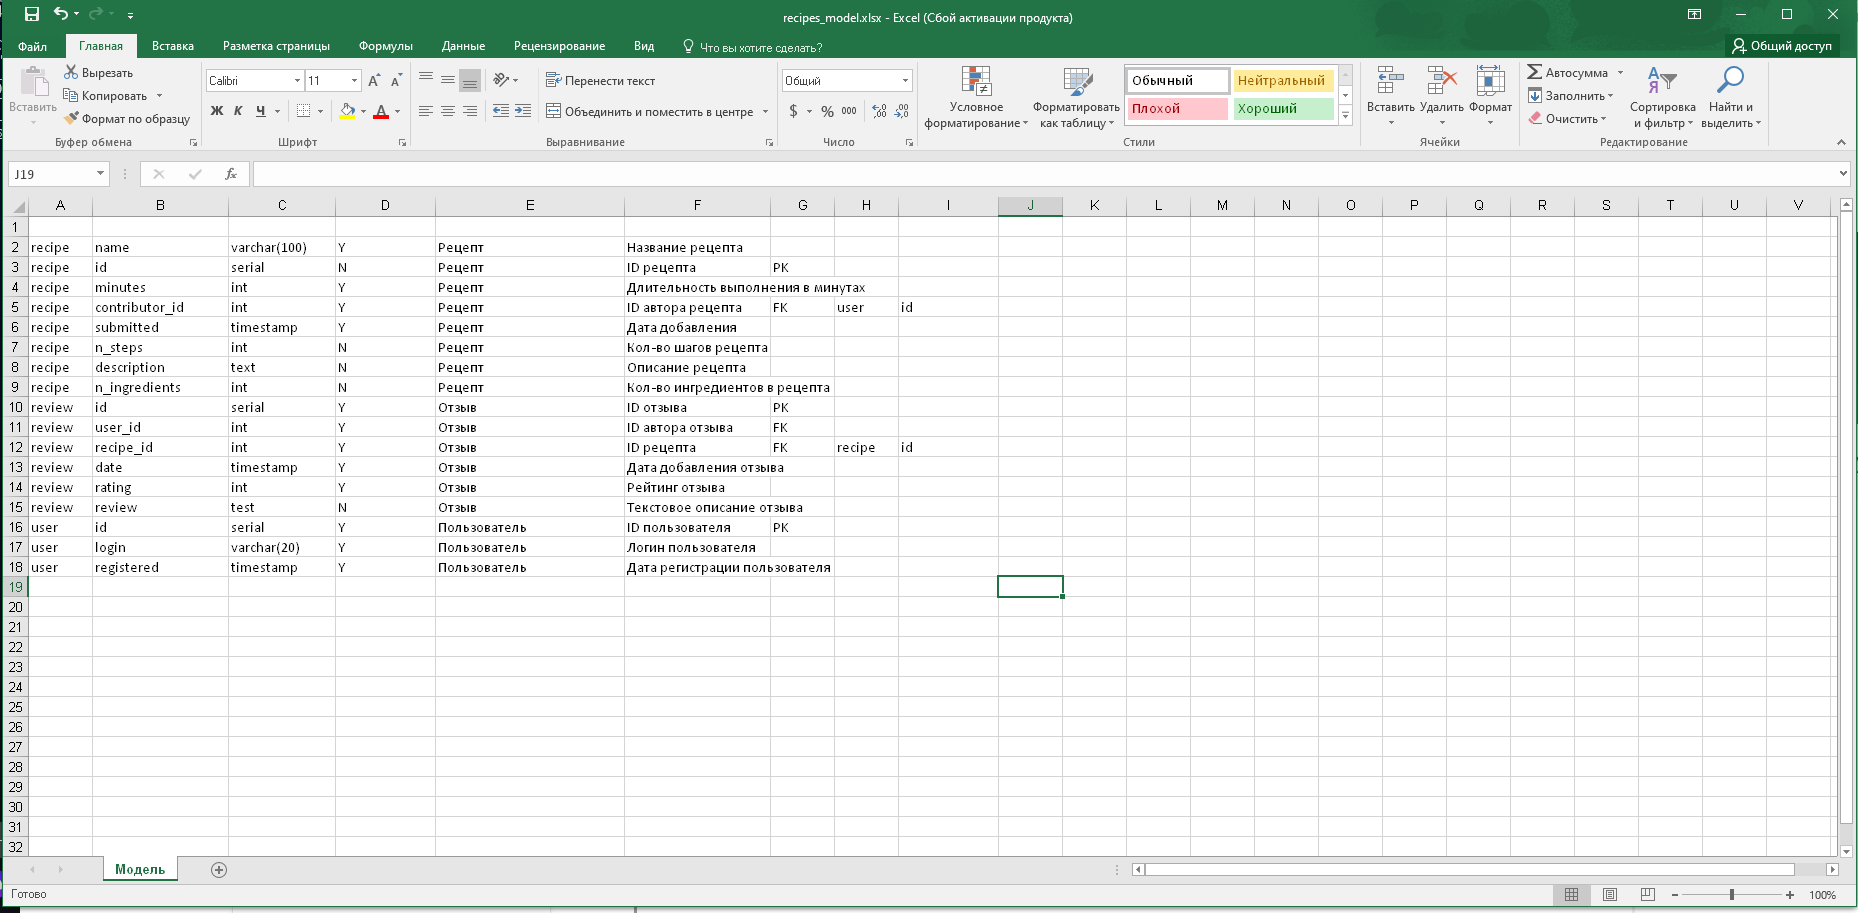

Руководствуясь неполнотой исходных данных дополню таблицу заголовками и данными необходимыми для выполнения задания №10

10. При помощи пакета `xlwings` добавьте в столбец J формулу для описания столбца на языке SQL. Формула должна реализовывать следующую логику:

    1\. в начале строки идут значения из столбцов В и C (значение столбца С приведено к верхнему регистру), разделенные пробелом
    
    2\. далее идут слова на основе столбца "Ключ"
        2.1 если в столбце "Ключ" указано значение "PK", то дальше через пробел идет ключевое слово "PRIMARY KEY"
        2.2 если в столбце "Ключ" указано значение "FK", то дальше через пробел идет ключевое слово "REFERENCES", затем значения столбцов H и I в формате "название_таблицы(название_столбца)"
        
    3\. если в столбце "Обязательно к заполнению" указано значение "Y" и в столбце "Ключ" указано не "PK", то дальше через пробел идет ключевое слово "NOT NULL".

Заполните этой формулой необходимое количество строк, используя "протягивание". Количество строк для протягивания определите на основе данных.

Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука.

In [4]:
#Проблема с описанием на языке SQL

11. При помощи пакета `xlwings` измените стилизацию листа `Модель`.
* для заголовков добавьте заливку цвета `00ccff`
* примените автоподбор ширины столбца;
* сделайте шрифт заголовков полужирным;
* добавьте таблице автофильтр.

Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука.

In [2]:
import xlwings as xw
wb = xw.Book('recipes_model.xlsx')
wb.sheets["Модель"].activate()
header=xw.Range('A1:I1')
header.color = (0,204,255)
wb.sheets["Модель"].autofit()
header.api.Font.Bold = True
header.api.AutoFilter(Field:=1)
wb.save()
wb.close()

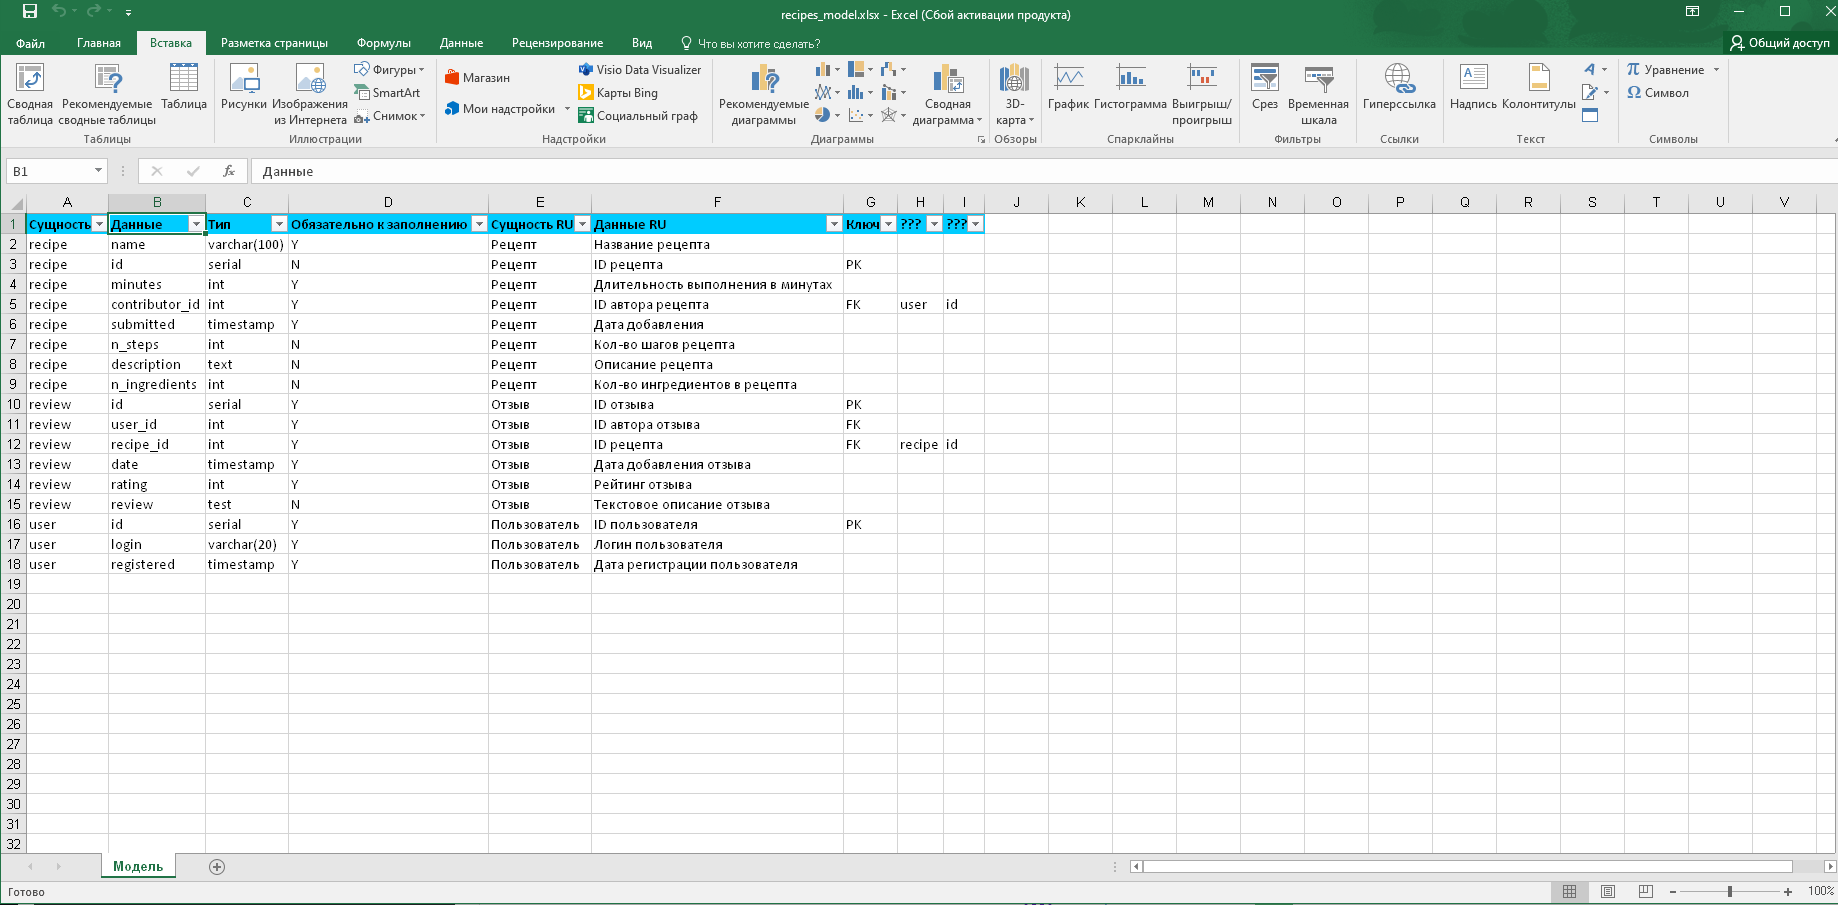

12. Посчитайте количество атрибутов для каждой из сущностей. Создайте лист `Статистика` и запишите в него результат группировки, начиная с ячейки "А1". Визуализируйте полученный результат при помощи столбчатой диаграммы. Сохраните полученную визуализацию на лист `Статистика`, начиная с ячейки "E2".  Сделайте скриншот листа `Статистика` и прикрепите в ячейку ноутбука.

* Вы можете воспользоваться методами для визуализации, которые поставляются вместе с объектами `pandas` (см. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot) 

<AxesSubplot:xlabel='Сущность'>

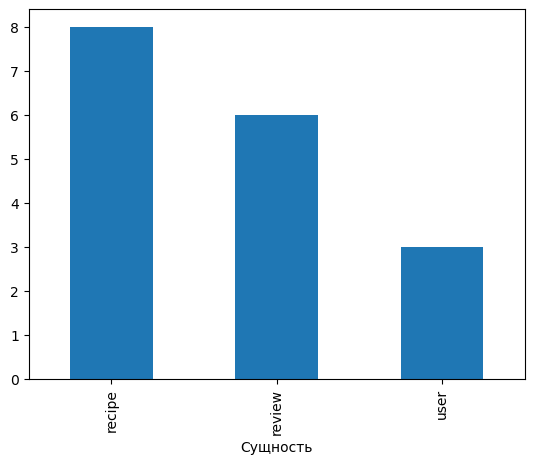

In [19]:
import pandas as pd
import xlwings as xw
import matplotlib.pyplot as plt
wb = xw.Book('recipes_model.xlsx')
sht=wb.sheets["Модель"]
todf = sht.range('A1:I18').options(pd.DataFrame, 
                             header=1,expand='table',index=False, transpose=False).value
gb=todf.groupby(todf['Сущность']).count()
gb=gb.transpose()
plt.figure()
visualize = gb.iloc[0].plot(kind='bar')
#gb.iloc[0].plot.barh(stacked=True)#Альтернатива
#wb.sheets.add()
#wb.sheets['Лист1'].name = "Статистика"#Альтернатива создание листа
visualize

In [17]:
import xlsxwriter
import pandas as pd
from io import BytesIO
import xlsxwriter
workbook = xlsxwriter.Workbook('insert_img.xlsx')
worksheet = workbook.add_worksheet() 

filename = 'diagramm.png'

file = open(filename, 'rb')
data = BytesIO(file.read())
file.close()

worksheet.insert_image('E2', filename, {'image_data': data})

workbook.close()